# Step 1: Setup & Data Loading

In [1]:
# ─── 1. INSTALL & IMPORT ────────────────────────────────
# Install seaborn for extra plotting (only if needed)
!pip install -q seaborn

# Standard data libraries
import pandas as pd
import numpy as np

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools from scikit-learn
from sklearn.model_selection import train_test_split

# TODO: Run this cell to load all the libraries


You should consider upgrading via the '/Users/jidarwish/Documents/JNations-2025/env/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# ─── 1. LOAD THE DATA ───────────────────────────────────
# URL of the Adult Income CSV (hosted on GitHub)
url = "https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/refs/heads/master/adult.csv"

# Read into a DataFrame
df = pd.read_csv(url)

# TODO: Inspect the first rows to see columns and values
df.head()

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# # Column names based on the dataset description
# columns = [
#     'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
#     'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
#     'hours-per-week', 'native-country', 'income'
# ]

# # Read the dataset into a pandas DataFrame
# df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True) # CHECK THIS

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Step 2: Exploratory Data Analysis (EDA)

In [3]:
# ─── 2.1 CHECK SHAPE & TYPES ─────────────────────────────
print("Records, Features:", df.shape)
df.info()
# TODO: Note which columns are numeric vs object (categorical)


Records, Features: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


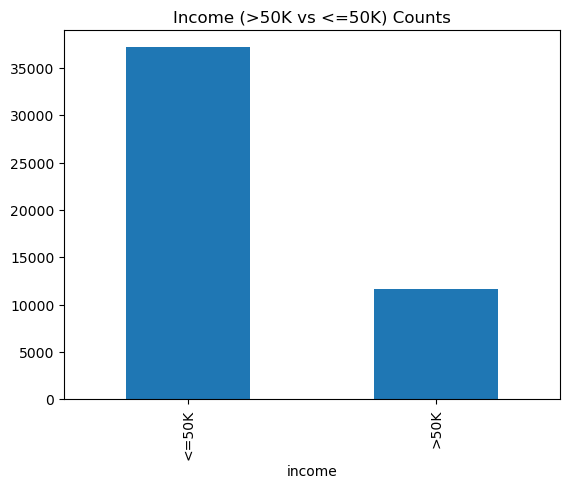

In [4]:
# ─── 2.2 TARGET DISTRIBUTION ────────────────────────────
df['income'].value_counts().plot(
    kind='bar', title='Income (>50K vs <=50K) Counts'
)
plt.show()
# TODO: What % earn >50K?


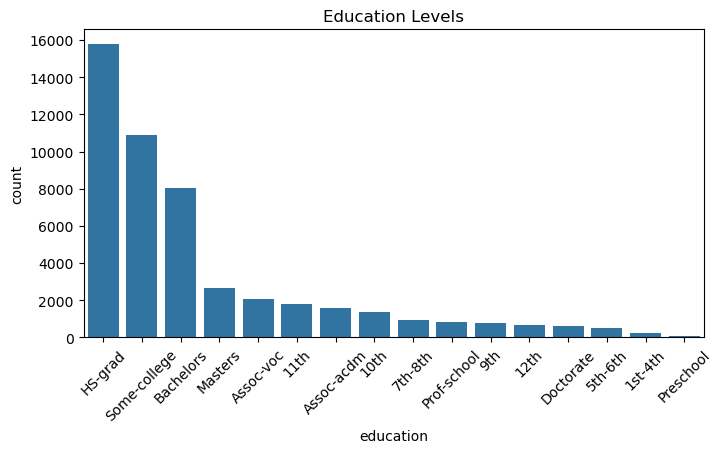

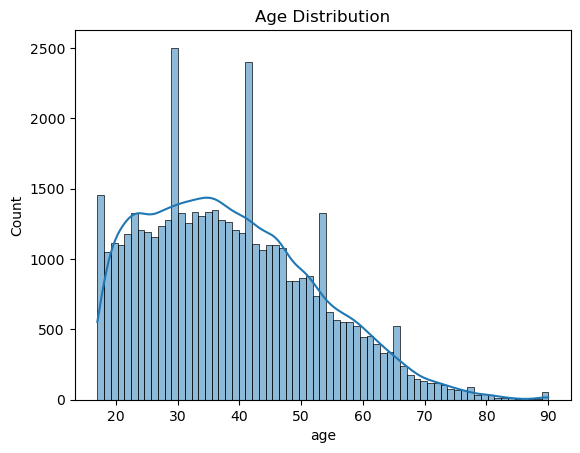

In [5]:
# ─── 2.3 FEATURE VISUALIZATIONS ─────────────────────────
# Categorical: education
plt.figure(figsize=(8,4))
sns.countplot(x='education', data=df,
              order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Levels")
plt.show()

# Numeric: age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# TODO: Which features look most imbalanced?


# Step 3: Data Preprocessing

In [6]:
# ─── 3.1 HANDLE MISSING VALUES ───────────────────────────
df = df.replace('?', np.nan)   # '?' marks missing in this dataset
df = df.dropna()               # simple drop for workshop
# TODO: How many rows were removed?

In [7]:
# ─── 3.2 ENCODE CATEGORICALS ────────────────────────────
cat_cols = df.select_dtypes('object').columns.drop('income')
df_enc = pd.get_dummies(df, columns=cat_cols)
# TODO: Inspect df_enc.columns to see new dummy columns

In [8]:
# ─── 3.3 BINARY TARGET & SCALING ────────────────────────
# Convert target to 0/1
df_enc['income'] = df['income'].map({'<=50K':0, '>50K':1})

# Scale numeric features
from sklearn.preprocessing import StandardScaler
num_cols = ['age','fnlwgt','educational-num',
            'capital-gain','capital-loss','hours-per-week']
scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])


In [9]:
# ─── 3.4 TRAIN/TEST SPLIT ────────────────────────────────
X = df_enc.drop('income', axis=1)
y = df_enc['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y
# TODO: What are the shapes of X_train and X_test?


0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

# Step 4: Model Training & Evaluation

In [10]:
# ─── 4.1 TRAIN MODEL ─────────────────────────────────────
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# TODO: This may take ~30 seconds – watch for convergence warnings.

LogisticRegression(max_iter=1000)

In [11]:
# ─── 4.2 PREDICT & ACCURACY ──────────────────────────────
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8518518518518519


In [12]:
# ─── 4.3 DETAILED METRICS ───────────────────────────────
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.60      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.85      0.85      0.85      9045



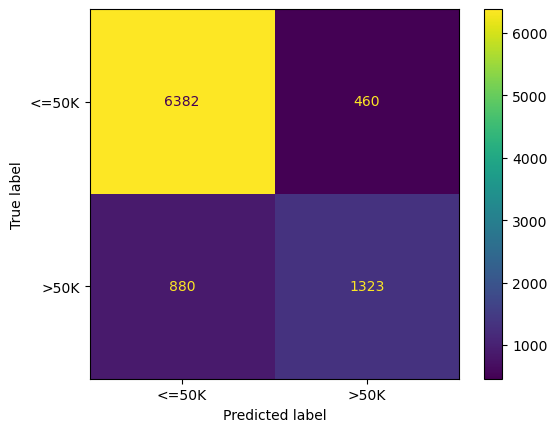

In [13]:
# ─── 4.4 CONFUSION MATRIX ───────────────────────────────
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['<=50K','>50K'])
disp.plot()
plt.show()
# TODO: Identify TP, FP, FN, TN cells

# Step 5: Simple Fairness Check

In [14]:
# ─── 5.1 EXTRACT GENDER INFO ─────────────────────────────
# We need the original 'sex' column before one-hot:
sex = df['gender']
# .reset_index(drop=True)
test_sex = sex[X_test.index]

# TODO: Ensure test_sex aligns with X_test indices

In [15]:
# ─── 5.2 GROUP METRICS ───────────────────────────────────
mask_m = (test_sex == 'Male')
mask_f = (test_sex == 'Female')

from sklearn.metrics import accuracy_score
acc_m = accuracy_score(y_test[mask_m], y_pred[mask_m])
acc_f = accuracy_score(y_test[mask_f], y_pred[mask_f])

print(f"Male accuracy:   {acc_m:.3f}")
print(f"Female accuracy: {acc_f:.3f}")
# TODO: Discuss why these may differ

Male accuracy:   0.815
Female accuracy: 0.928
